   Temperature  Humidity  Moisture Soil Type Crop Type  Nitrogen  Potassium  \
0           20        83        26    Clayey      rice        90         49   
1           25        84        32     Loamy      rice        66         59   
2           33        64        50     Loamy     Wheat        41          0   
3           34        65        54     Loamy     Wheat        38          0   
4           38        72        51     Loamy     Wheat        39          0   

   Phosphorous Fertilizer Name  
0           36            Urea  
1           36            Urea  
2            0            Urea  
3            0            Urea  
4            0            Urea  
Shape of the dataframe: (552, 9)

Data types of each column:
Temperature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

Descriptive stati

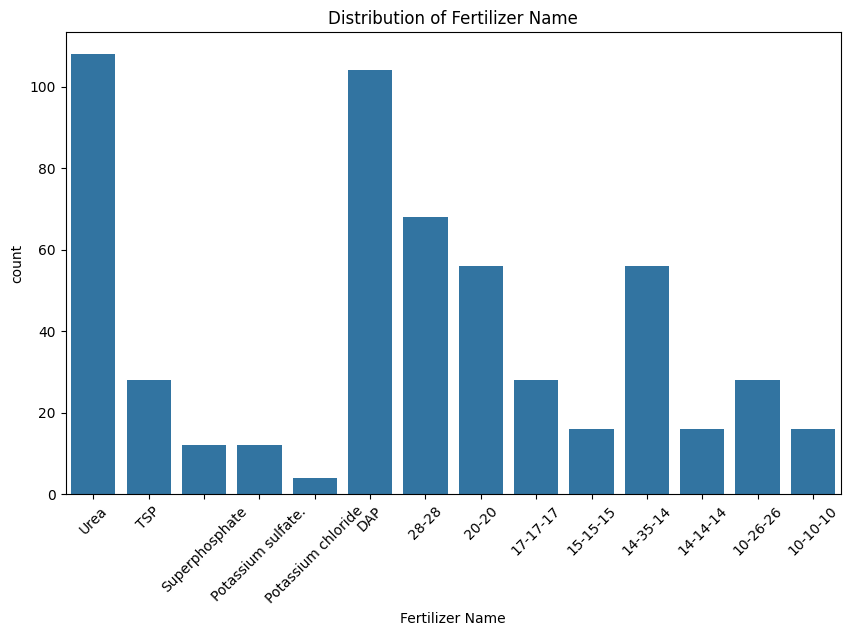

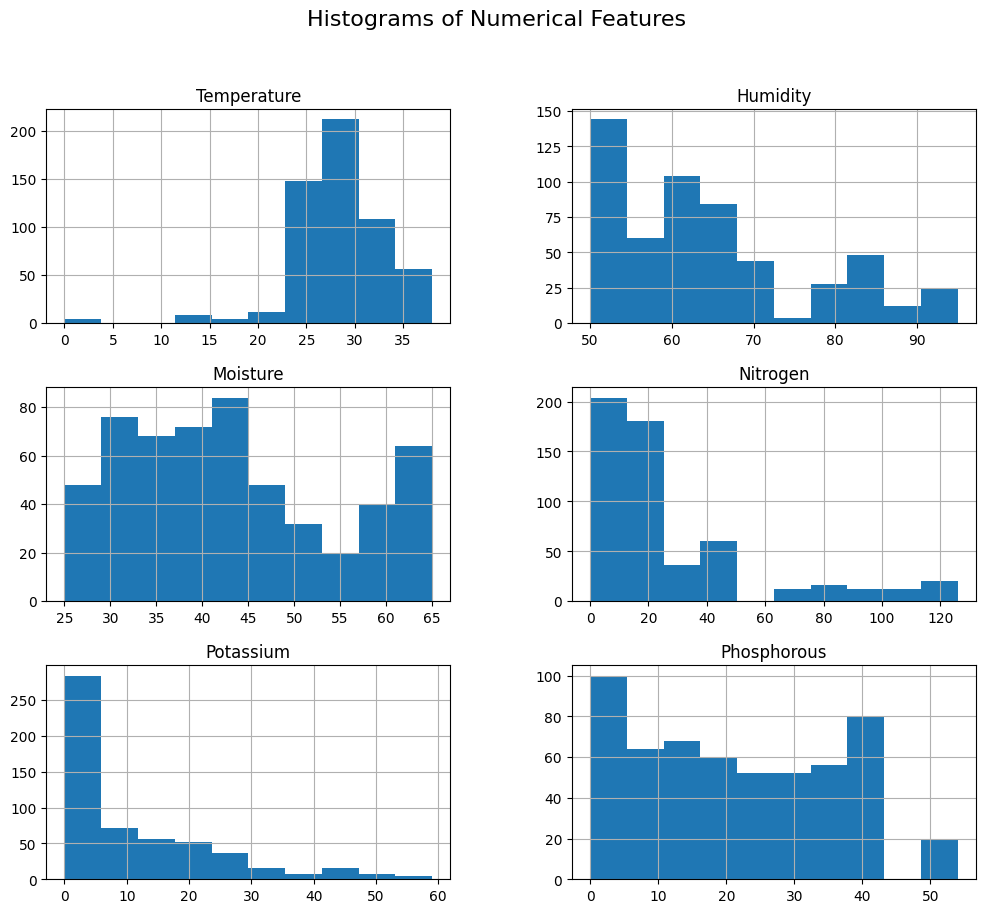

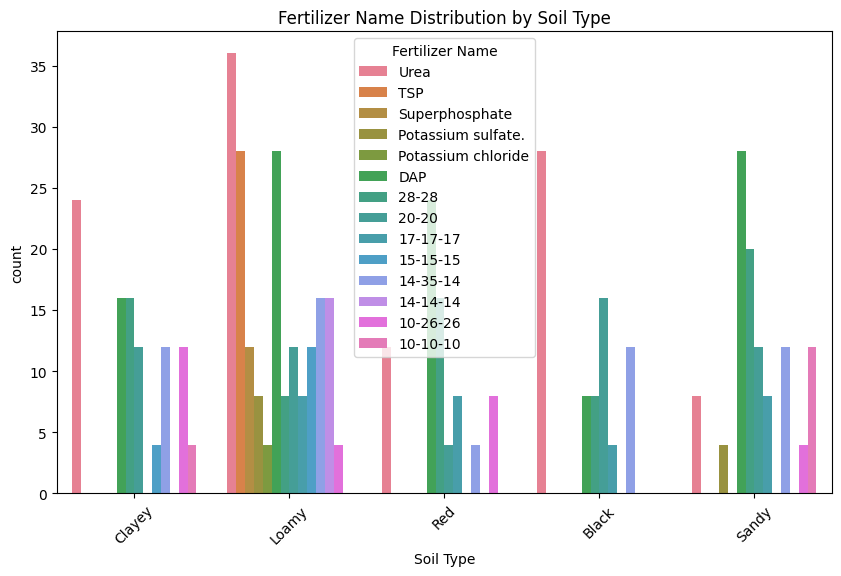

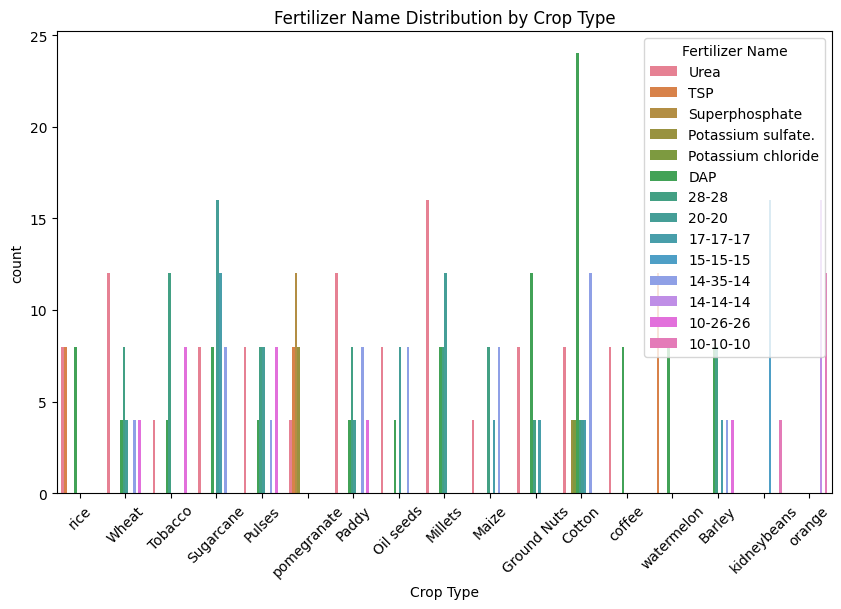

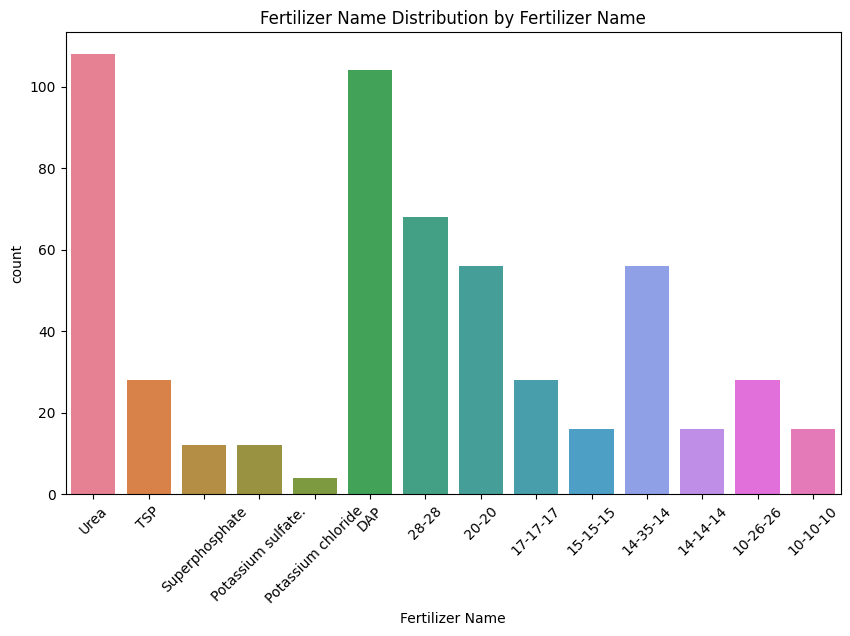

Shape of X_train: (441, 8)
Shape of X_test: (111, 8)
Shape of y_train: (441,)
Shape of y_test: (111,)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        16
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        24

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle



# Load the dataset
data = pd.read_csv('Fertilizer_Recommendation2.csv')

# Display the first few rows of the dataframe
print(data.head())

# Get the shape of the dataframe
print(f'Shape of the dataframe: {data.shape}')

# Check the data types of each column
print('\nData types of each column:')
print(data.dtypes)

# Generate descriptive statistics
print('\nDescriptive statistics:')
print(data.describe())

# Check for missing values
print('\nMissing values:')
print(data.isnull().sum())

# Analyze the distribution of the target variable 'Fertilizer Name'
print('\nDistribution of Fertilizer Name:')
print(data['Fertilizer Name'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Fertilizer Name', data=data)
plt.title('Distribution of Fertilizer Name')
plt.xticks(rotation=45)
plt.savefig('fertilizer_distribution.png')
plt.show()

# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['number']).columns
data[numerical_features].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.savefig('numerical_features_histograms.png')
plt.show()

# Visualize the relationship between categorical features and the target variable
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Fertilizer Name', data=data)
    plt.title(f'Fertilizer Name Distribution by {feature}')
    plt.xticks(rotation=45)
    plt.savefig(f'{feature}_fertilizer_distribution.png')
    plt.show()

# Encoding categorical features
categorical_features = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

# Splitting the data into training and testing sets
X = data.drop('Fertilizer Name', axis=1)
y = data['Fertilizer Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f'\nBest Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'\nAccuracy with Best Parameters: {accuracy_best}')
print('\nClassification Report with Best Parameters:')
print(classification_report(y_test, y_pred_best))

#with open("Fertilizer_recommendation.pkl", "wb") as f:
#    pickle.dump(best_rf_model, f)


In [3]:
for col in ["Soil Type", "Crop Type", "Fertilizer Name"]:
    temp_encoder = LabelEncoder()
    temp_encoder.fit(orig_data[col])
    mapping = {encoded: original for encoded, original in zip(temp_encoder.transform(temp_encoder.classes_), temp_encoder.classes_)}
    print(f"Mapping for {col}:")
    print(mapping)
    print("-" * 30)

Mapping for Soil Type:
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}
------------------------------
Mapping for Crop Type:
{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat', 11: 'coffee', 12: 'kidneybeans', 13: 'orange', 14: 'pomegranate', 15: 'rice', 16: 'watermelon'}
------------------------------
Mapping for Fertilizer Name:
{0: '10-10-10', 1: '10-26-26', 2: '14-14-14', 3: '14-35-14', 4: '15-15-15', 5: '17-17-17', 6: '20-20', 7: '28-28', 8: 'DAP', 9: 'Potassium chloride', 10: 'Potassium sulfate.', 11: 'Superphosphate', 12: 'TSP', 13: 'Urea'}
------------------------------
